<a href="https://colab.research.google.com/github/Lariiuki/Pos-Deep-Learning/blob/main/Resumo_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Matemática para Deeplearning - PCA

**Grupo:** Larissa Akemi Iuki, Marcos Vinicuis Suguino, Ana Vitória da Silva Santos, Luan Fernandes de França, Vinicius da Silva Ferreira Lima

## Explicação do exemplo prático 🔎

**Objetivo:** Apresentar um resumo sobre a Análise de Componentes Principais (PCA), combinando a explicação teórica com um exemplo prático, a fim de facilitar a compreensão do funcionamento e das aplicações dessa técnica estatística.

**Dataset:** O conjunto de dados Iris é um dos mais usados em ciência de dados e estatística. Ele contém 150 registros de flores do tipo Iris, divididos em três espécies: setosa, versicolor e virginica.





### **Carregando os dados**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dataset = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/Iris.csv")
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
target_col = "Species"
print(f"Quantas classes existem nesse dataset: {len(dataset[target_col].unique())}")
print(f"Quantas instancias existem: {dataset.shape[0]}")
print(f"Quantidade features: {dataset.shape[1] -1}")

Quantas classes existem nesse dataset: 3
Quantas instancias existem: 150
Quantidade features: 4


As duas características das pétalas, comprimento e largura

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

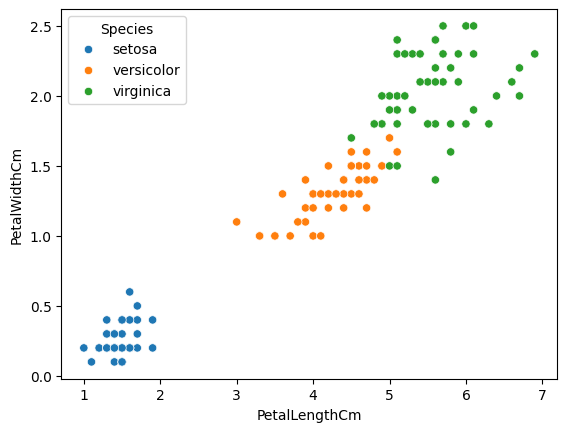

In [19]:
sns.scatterplot(data=dataset, x="PetalLengthCm", y="PetalWidthCm", hue="Species")

As duas características da sépala, comprimento e largura

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

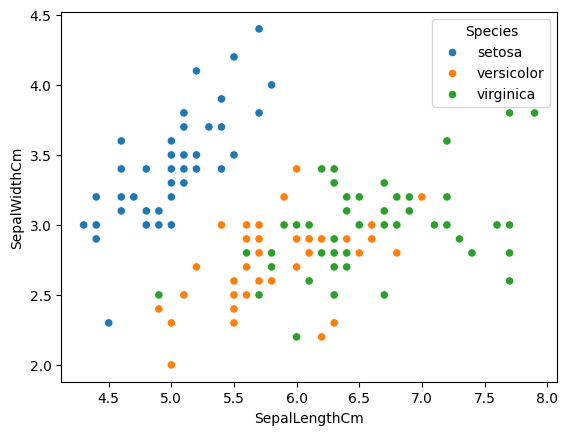

In [17]:
sns.scatterplot(data=dataset, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

### **Padronização dos Dados**

Antes de aplicar o PCA, é importante padronizar os dados para que todas as variáveis fiquem na mesma escala, com média 0 e desvio padrão 1. Isso evita que características com valores maiores influenciem mais os resultados.

In [29]:
from sklearn.preprocessing import StandardScaler

# seleciona 4 característica númericas do conjunto
features = dataset[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']]

# aplicando a padronização
scaled_features = StandardScaler().fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_df.head())

   PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm
0      -1.341272     -1.312977      -0.900681      1.032057
1      -1.341272     -1.312977      -1.143017     -0.124958
2      -1.398138     -1.312977      -1.385353      0.337848
3      -1.284407     -1.312977      -1.506521      0.106445
4      -1.341272     -1.312977      -1.021849      1.263460


Após aplicar o StandardScaler, obtivemos os seguintes valores padronizados para as cinco primeiras amostras do conjunto de dados Iris.

Esses valores representam o número de desvios padrão que cada medida está acima ou abaixo da média da sua respectiva coluna. Por exemplo:

* O valor ```-1.341272``` em PetalLengthCm indica que essa pétala é aproximadamente ```1,34``` desvios padrão menor do que a média geral de comprimento de pétalas.

* O valor ```1.032057``` em SepalWidthCm indica que a largura da sépala é ```1,03``` desvios padrão maior que a média.

Esse comportamento faz sentido, especialmente para amostras da espécie Iris setosa, que costumam ter pétalas menores e sépalas mais largas em comparação com as outras espécies.

A padronização garante que todas as características tenham influência igual na aplicação da **Análise de Componentes Principais (PCA)**, evitando que variáveis com valores maiores dominem a análise.


## PCA

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)

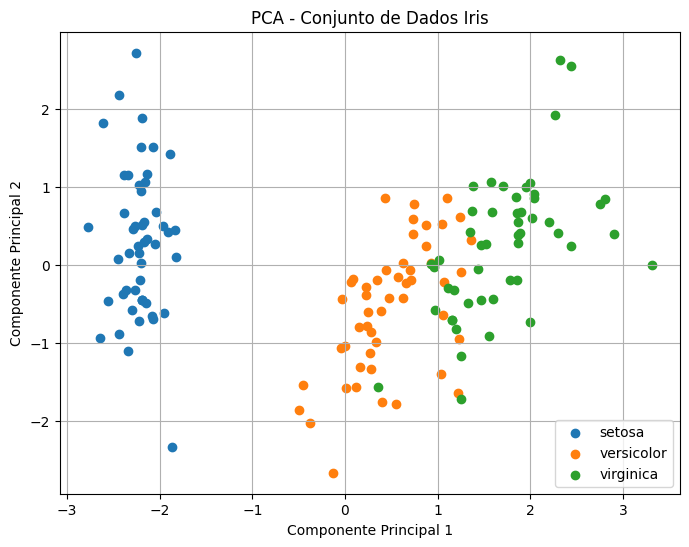

In [39]:
import matplotlib.pyplot as plt

# criando um DataFrame com os dois componentes principais e a espécie
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pca_df['Species'] = dataset['Species']  # Adiciona a coluna de rótulo

plt.figure(figsize=(8, 6))
species = pca_df['Species'].unique()

for sp in species:
    subset = pca_df[pca_df['Species'] == sp]
    plt.scatter(subset['PC1'], subset['PC2'], label=sp)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Conjunto de Dados Iris')
plt.legend()
plt.grid(True)
plt.show()

Testando com 1 componente

In [43]:
pcasolo = PCA(n_components = 1)
solo_PrincipalComponent = pcasolo.fit_transform(scaled_features)

In [44]:
pca_1D_df = pd.DataFrame(data=solo_PrincipalComponent, columns=['PC1'])
pca_1D_df['Species'] = dataset['Species']

print(pca_1D_df.head())

        PC1 Species
0 -2.264542  setosa
1 -2.086426  setosa
2 -2.367950  setosa
3 -2.304197  setosa
4 -2.388777  setosa


/tmp/ipython-input-3333082582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=pca_1D_df, x='Species', y='PC1', jitter=True, palette='Set2')


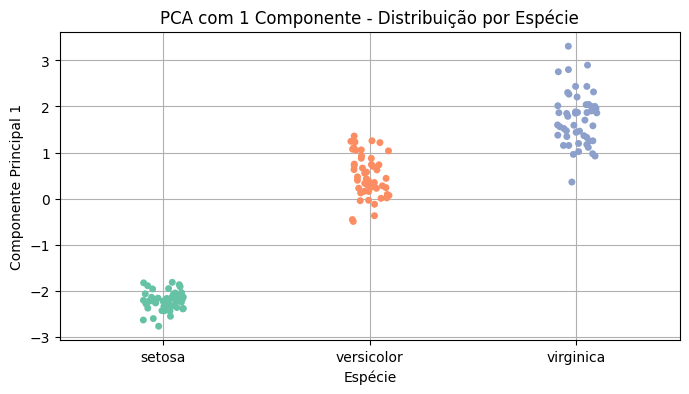

In [45]:
plt.figure(figsize=(8, 4))
sns.stripplot(data=pca_1D_df, x='Species', y='PC1', jitter=True, palette='Set2')

plt.title('PCA com 1 Componente - Distribuição por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Componente Principal 1')
plt.grid(True)
plt.show()